In [1]:
# Author: Rui Yan
from glob import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from shutil import copyfile

base_dir = "./flowers_original/"
categories = [f for f in os.listdir(base_dir) if not f.startswith('.')]
print(categories)

['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']


In [2]:
# Make a parent directory `data` and three sub directories `train`, `valid` and 'test'
%rm -rf flowers # Remove if already present

%mkdir -p flowers/train/daisy
%mkdir -p flowers/train/tulip
%mkdir -p flowers/train/sunflower
%mkdir -p flowers/train/rose
%mkdir -p flowers/train/dandelion

%mkdir -p flowers/valid/daisy
%mkdir -p flowers/valid/tulip
%mkdir -p flowers/valid/sunflower
%mkdir -p flowers/valid/rose
%mkdir -p flowers/valid/dandelion

%mkdir -p flowers/test/daisy
%mkdir -p flowers/test/tulip
%mkdir -p flowers/test/sunflower
%mkdir -p flowers/test/rose
%mkdir -p flowers/test/dandelion

%ls flowers/train
%ls flowers/valid
%ls flowers/test

daisy/     dandelion/ rose/      sunflower/ tulip/
daisy/     dandelion/ rose/      sunflower/ tulip/
daisy/     dandelion/ rose/      sunflower/ tulip/


In [3]:
def train_valid_test(files):
    """ This function splits the files in train, validation and test sets with 70%, 20%
    and 10% of data in each respectively """
    train_files = files[:int(len(files)*0.7)]
    valid_files = files[int(len(files)*0.7):int(len(files)*0.9)]
    test_files = files[int(len(files)*0.9):]
    return train_files, valid_files, test_files

In [4]:
def copy_files(files, dest):
    """This function copy files from src to dest"""
    for file in files:
        copyfile(file, "{}/{}".format(dest, os.path.basename(file)))

In [5]:
def plot_images(category, images):
    """This method plots five images from a category"""
    for i in range(len(images)):
        plt.subplot(1,5,i+1)
        plt.title(category)
        image = mpimg.imread(images[i])
        plt.imshow(image)
    plt.show()

In [6]:
rows = ['train', 'valid', 'test']
data = np.zeros((len(rows), len(categories)))
print(data)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]




There are 538 images in ./flowers/train/daisy/
There are 154 images in ./flowers/valid/daisy/
There are 77 images in ./flowers/test/daisy/


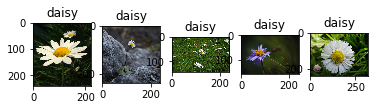



There are 548 images in ./flowers/train/rose/
There are 157 images in ./flowers/valid/rose/
There are 79 images in ./flowers/test/rose/


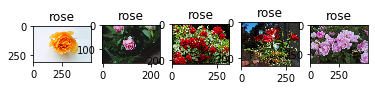



There are 688 images in ./flowers/train/tulip/
There are 197 images in ./flowers/valid/tulip/
There are 99 images in ./flowers/test/tulip/


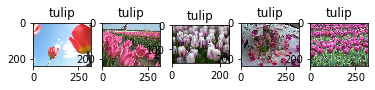



There are 736 images in ./flowers/train/dandelion/
There are 210 images in ./flowers/valid/dandelion/
There are 106 images in ./flowers/test/dandelion/


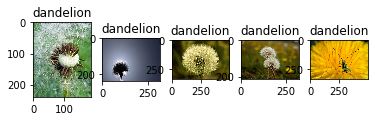



There are 513 images in ./flowers/train/sunflower/
There are 147 images in ./flowers/valid/sunflower/
There are 74 images in ./flowers/test/sunflower/


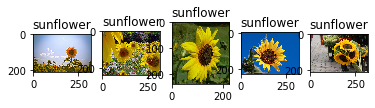

[[538. 548. 688. 736. 513.]
 [154. 157. 197. 210. 147.]
 [ 77.  79.  99. 106.  74.]]


In [7]:
for i, foldername in enumerate(categories):
    files = glob(base_dir+foldername+'/*.jpg')
    split_files = train_valid_test(files)
    print("\n")
    
    # splitting the dataset into train, validation, and test
    # there are three classes: train, valid, and test
    for j, files in enumerate(split_files): 
        data[j, i] = len(files)
        print("There are "+str(len(files))+" images in ./flowers/"+rows[j]+'/'+foldername+'/')
        copy_files(files, './flowers/'+rows[j]+'/'+foldername)
    
    # plotting five examples from each category
    plot_images(foldername, files[:5])
    
print(data)

Statistics of flowers

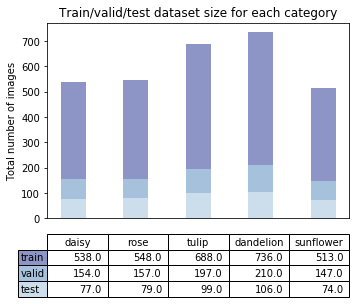

In [10]:
# y = np.arange(len(categories))
# plt.bar(y, total_images, width=0.2, align='center')
# plt.xticks(y, categories)
# plt.ylabel("Image count")
# plt.title("Image count in different categories")
# plt.show()

colors = plt.cm.BuPu(np.linspace(0.2, 0.5, len(rows)))
colors = colors[::-1]

index = np.arange(len(categories)) + 0.3
bar_width = 0.4

# Plot bars and create text labels for the table
cell_text = []
for row in range(len(rows)):
    plt.bar(index, data[row], bar_width, color=colors[row])
    cell_text.append([str(x) for x in data[row]])

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=categories,
                      loc='bottom',
                      bbox=[0.0,-0.4,1,.32])

# # Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Total number of images")
plt.xticks([])
plt.title('Train/valid/test dataset size for each category')
plt.savefig('dataset_size_plot.jpg')
plt.show()
